In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df_score = pd.read_csv("./")

In [3]:
df_train = pd.read_csv("./data_train.csv")
df_train.drop(columns=["Unnamed: 0"],inplace=True)
df_train

FileNotFoundError: [Errno 2] No such file or directory: './data_train.csv'

In [6]:
x_train = df_train.iloc[:,1:].values
y_train = df_train.iloc[:,0].values

In [7]:
scale = MinMaxScaler()
x_train = scale.fit_transform(x_train)

In [8]:
df_test = pd.read_csv("../Model_Blending_PSO/data_test_pso.csv")
df_test.drop(columns=["Unnamed: 0"],inplace=True)
df_test

,0,1,4,6,7,8,10,11,12,13,...,180,185,186,192,196,202,203,204,208,211
0,0.0,14.0,153.204817,0.996355,0.207174,459.037295,-28.0,13.0,13.0,358.307692,...,92.686391,554.0,0.999941,10.0,710.615385,794.307350,0.928571,-10.000000,729.000000,127.600000
1,0.0,10.0,266.399867,0.979352,0.388359,398.464564,-60.0,10.0,6.0,532.800000,...,7281.937500,932.0,0.965488,4.0,968.222222,900.143486,0.600000,64.000000,15314.750000,112.285714
2,0.0,11.0,251.329664,0.260470,-1.002325,340.802438,-52.0,8.0,7.0,403.000000,...,2661.728395,784.0,0.270281,6.0,796.400000,1236.308241,1.000000,26.000000,1944.489796,131.111111
3,2.0,13.0,8.986100,0.048579,-1.449012,412.324324,-5.0,12.0,12.0,322.333333,...,787.638889,26.0,-0.014314,12.0,757.333333,803.828940,1.000000,-4.000000,6122.750000,121.833333
4,0.0,23.0,82.344017,3.023659,10.404884,168.041577,7.0,9.0,20.0,223.750000,...,1288.640000,398.0,1.761865,16.0,396.173913,316.582423,0.083333,0.022262,0.044242,45.818182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2125,1.0,9.0,36.509417,1.263183,0.543003,364.303573,-18.0,9.0,8.0,438.571429,...,4051.918367,118.0,1.263183,8.0,1071.250000,856.643246,0.777778,0.000000,2843.265306,96.000000
2126,1.0,8.0,33.839959,-0.454057,-1.036905,181.876516,0.0,8.0,7.0,463.142857,...,10.750000,104.0,-0.457057,5.0,1196.000000,746.905354,1.000000,-26.000000,228.555556,169.142857
2127,3.0,16.0,23.734082,0.371174,-0.657132,137.696567,-10.0,16.0,15.0,335.733333,...,739.982222,82.0,0.348673,14.0,595.600000,333.718093,1.000000,-8.000000,1270.061224,90.400000
2128,1.0,8.0,180.470587,0.587475,-1.363827,561.988537,12.0,8.0,7.0,462.000000,...,431.750000,448.0,0.587475,5.0,1080.571429,588.205240,1.000000,18.000000,51.840000,101.000000


In [9]:
x_test = df_test.iloc[:,1:].values
y_test = df_test.iloc[:,0].values

In [10]:
x_test = scale.transform(x_test)

In [12]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
model = XGBClassifier()
# params = {
#     'n_estimators': [10,50,100,1000],
#     'learning_rate': [0.01,0.1,1,10],
#     'max_depth': [3,4,5],
#     'min_child_weight':[1],
#     'gamma':[0,0.1,0.2],
# }
# {'gamma': 0,
#  'learning_rate': 0.1,
#  'max_depth': 4,
#  'min_child_weight': 1,
#  'n_estimators': 1000}
# 0.961
params = {
    'n_estimators': [1000],
    'learning_rate': [0.05],
    'max_depth': [5],
    'min_child_weight':[1],
    'gamma':[0],
}
grid_search = GridSearchCV(estimator=model, param_grid=params, cv=3, verbose=5, return_train_score=True,refit=True)
grid_model = grid_search.fit(x_train,y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3] END gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=1000;, score=(train=1.000, test=0.967) total time=   9.8s
[CV 2/3] END gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=1000;, score=(train=1.000, test=0.957) total time=   9.1s
[CV 3/3] END gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=1000;, score=(train=1.000, test=0.945) total time=   8.6s


In [13]:
result_test = grid_model.predict(x_test)

In [14]:
grid_model.best_params_

{'gamma': 0,
 'learning_rate': 0.05,
 'max_depth': 5,
 'min_child_weight': 1,
 'n_estimators': 1000}

In [15]:
grid_model.best_score_

0.956433565733434

In [16]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,multilabel_confusion_matrix,f1_score,precision_score,accuracy_score,recall_score,precision_recall_fscore_support
def evaluation_test(y,y_pred):
    cm = confusion_matrix(y,y_pred)
    disp = ConfusionMatrixDisplay(cm,display_labels=['AFIB','SB','SR','GSVT'])
    disp.plot()
    plt.show()
    n_classes = len(cm)
    result = []
    for c in range(n_classes):
        tp = cm[c,c]
        fp = sum(cm[:,c]) - cm[c,c]
        fn = sum(cm[c,:]) - cm[c,c]
        tn = sum(np.delete(sum(cm)-cm[c,:],c))
        acc = (tp+tn) / (tp+fn+tn+fp)
        recall = tp/(tp+fn)
        precision = tp/(tp+fp)
        specificity = tn/(tn+fp)
        f1_score = 2*((precision*recall)/(precision+recall))
        if c+1 == 1:
            Rhythm = 'AFIB'
        elif c+1 == 2:
            Rhythm = 'SB'
        elif c+1 == 3:
            Rhythm = 'SR'
        else:
            Rhythm = 'GSVT'
        result.append([Rhythm,acc,recall,precision,f1_score,specificity])
    p_macro,r_macro,f_macro,support_macro = precision_recall_fscore_support(y,y_pred,average='macro')
    p_micro,r_micro,f_micro,support_micro = precision_recall_fscore_support(y,y_pred,average='micro')
    p_weighted,r_weighted,f_weighted,support_weighted = precision_recall_fscore_support(y,y_pred,average='weighted')
    result.append(['macro avg',None,f_macro,p_macro,r_macro,None])
    result.append(['micro avg',None,f_micro,p_micro,r_micro,None])
    result.append(['weighted avg',None,f_weighted,p_weighted,r_weighted,None])
    return result
        

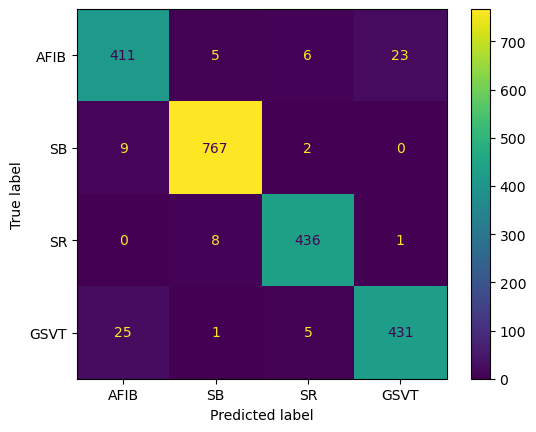

,Rhythm Group,ACC,F1-score,Precision,Recall,specificity
0,AFIB,0.968075,0.923596,0.923596,0.923596,0.979822
1,SB,0.988263,0.985861,0.982074,0.983964,0.989645
2,SR,0.989671,0.979775,0.971047,0.975391,0.992285
3,GSVT,0.974178,0.932900,0.947253,0.940022,0.985612
4,macro avg,NaN,0.955743,0.955992,0.955533,NaN
5,micro avg,NaN,0.960094,0.960094,0.960094,NaN
6,weighted avg,NaN,0.960030,0.960000,0.960094,NaN


In [17]:
evaluation_test = evaluation_test(y_test,result_test)
df_evaluation_test = pd.DataFrame(data=evaluation_test,columns=["Rhythm Group","ACC","F1-score","Precision","Recall","specificity"])
df_evaluation_test

In [18]:
# df_evaluation_test.to_csv("./Result/XGB.csv")